In [1]:
#importing necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500


In [2]:
#Reading the data from csv file
country_data = pd.read_csv('Country-data.csv')
country_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
#checking information about the DataFrame
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#getting the stastical info about the variables
country_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [5]:
country_data.shape

(167, 10)

In [6]:
#checking if there are any null values present in the dataset
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

__There are no null values present in any if the variables.__ 

__Converting the data from % to absolute values.__

In [7]:
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100

In [8]:
country_data.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
#creating dataframe that will be used for analysis and clustering
kmeansData = country_data.drop("country",axis=1)
kmeansData.head()

child_mort  exports    health   imports  income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297    1610       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740    9930       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440   12900      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370    5900      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

# 1) Univariate Analysis

In [10]:
#changing the style of the graphs
sns.set_style("darkgrid")

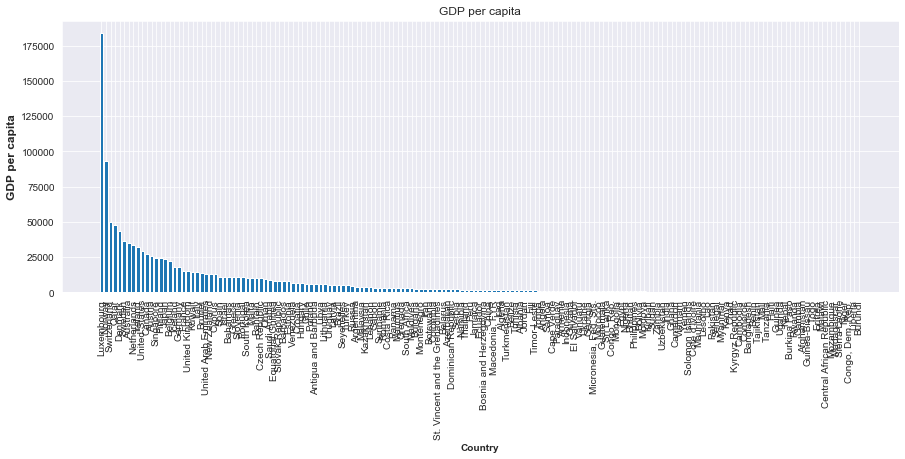

In [11]:
#verifying the gdp of the countries
plt.figure(figsize=(15,5))
df = country_data.sort_values('gdpp',ascending=False)
plt.bar(x=df.country,
        height=df.exports.sort_values(ascending=False))
plt.title('GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=90)
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

__This looks messy so we will check the boxplot for better picture.__

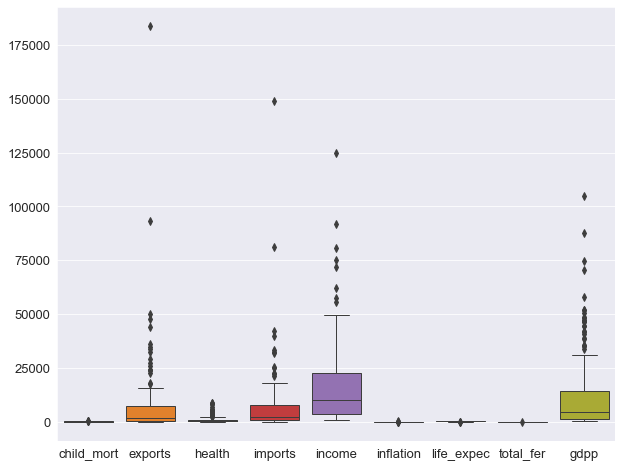

In [12]:
#plotting box plot of all the variables
plt.figure(figsize = (10,8))  
sns.boxplot(data=kmeansData,linewidth=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

#### We actually see some outliers in our data but we need to check if those are not some wrong data

In [13]:
IQR = country_data.gdpp.quantile(0.75) - country_data.gdpp.quantile(0.25)
country_data[['country','gdpp']][country_data.gdpp>country_data.gdpp.quantile(0.75) + 1.5*IQR].sort_values(
    'gdpp',ascending=False)

country    gdpp
91             Luxembourg  105000
114                Norway   87800
145           Switzerland   74600
123                 Qatar   70300
44                Denmark   58000
144                Sweden   52100
7               Australia   51900
110           Netherlands   50300
73                Ireland   48700
159         United States   48400
29                 Canada   47400
8                 Austria   46900
133             Singapore   46600
53                Finland   46200
77                  Japan   44500
15                Belgium   44400
68                Iceland   41900
58                Germany   41800
54                 France   40600
158        United Kingdom   38900
82                 Kuwait   38500
75                  Italy   35800
23                 Brunei   35300
157  United Arab Emirates   35000
111           New Zealand   33700

#### Here we have the gdpp data of the upper outlier and we some big countries and there gdpp which seems pretty reasonable

In [14]:
IQR = country_data.exports.quantile(0.75) - country_data.exports.quantile(0.25)
country_data[['country','exports']][country_data.exports>country_data.exports.quantile(0.75)+1.5*IQR].sort_values(
    'exports',ascending=False)

country   exports
91             Luxembourg  183750.0
133             Singapore   93200.0
73                Ireland   50161.0
145           Switzerland   47744.0
123                 Qatar   43796.9
110           Netherlands   36216.0
114                Norway   34856.6
15                Belgium   33921.6
98                  Malta   32283.0
44                Denmark   29290.0
157  United Arab Emirates   27195.0
82                 Kuwait   25679.5
144                Sweden   24070.2
8                 Austria   24059.7
23                 Brunei   23792.2
68                Iceland   22374.6
53                Finland   17879.4
58                Germany   17681.4

####  Here we have the exports data of the upper outlier and this also looks good like no exceptionally high values 

In [15]:
IQR = country_data.imports.quantile(0.75) - country_data.imports.quantile(0.25)
country_data[['country','imports']][country_data.imports>country_data.imports.quantile(0.75)+1.5*IQR].sort_values(
    'imports',ascending=False)

country   imports
91             Luxembourg  149100.0
133             Singapore   81084.0
73                Ireland   42125.5
145           Switzerland   39761.8
15                Belgium   33166.8
98                  Malta   32494.0
110           Netherlands   31990.8
44                Denmark   25288.0
114                Norway   25023.0
8                 Austria   22418.2
157  United Arab Emirates   22260.0
144                Sweden   21204.7

### Pair plot

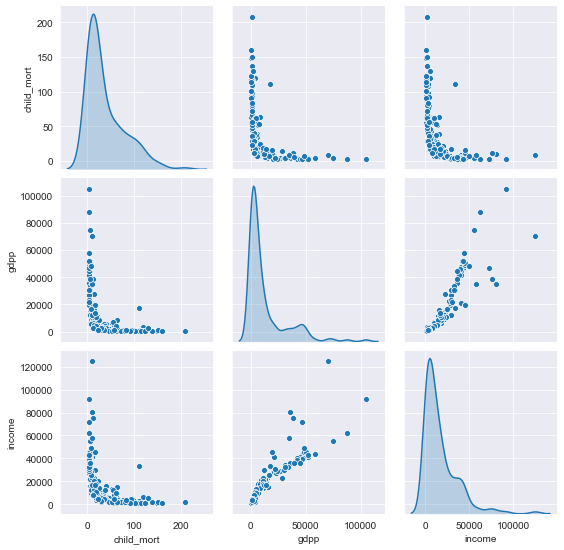

In [16]:
sns.pairplot(kmeansData,vars=['child_mort','gdpp','income'],diag_kind='kde')
plt.show()

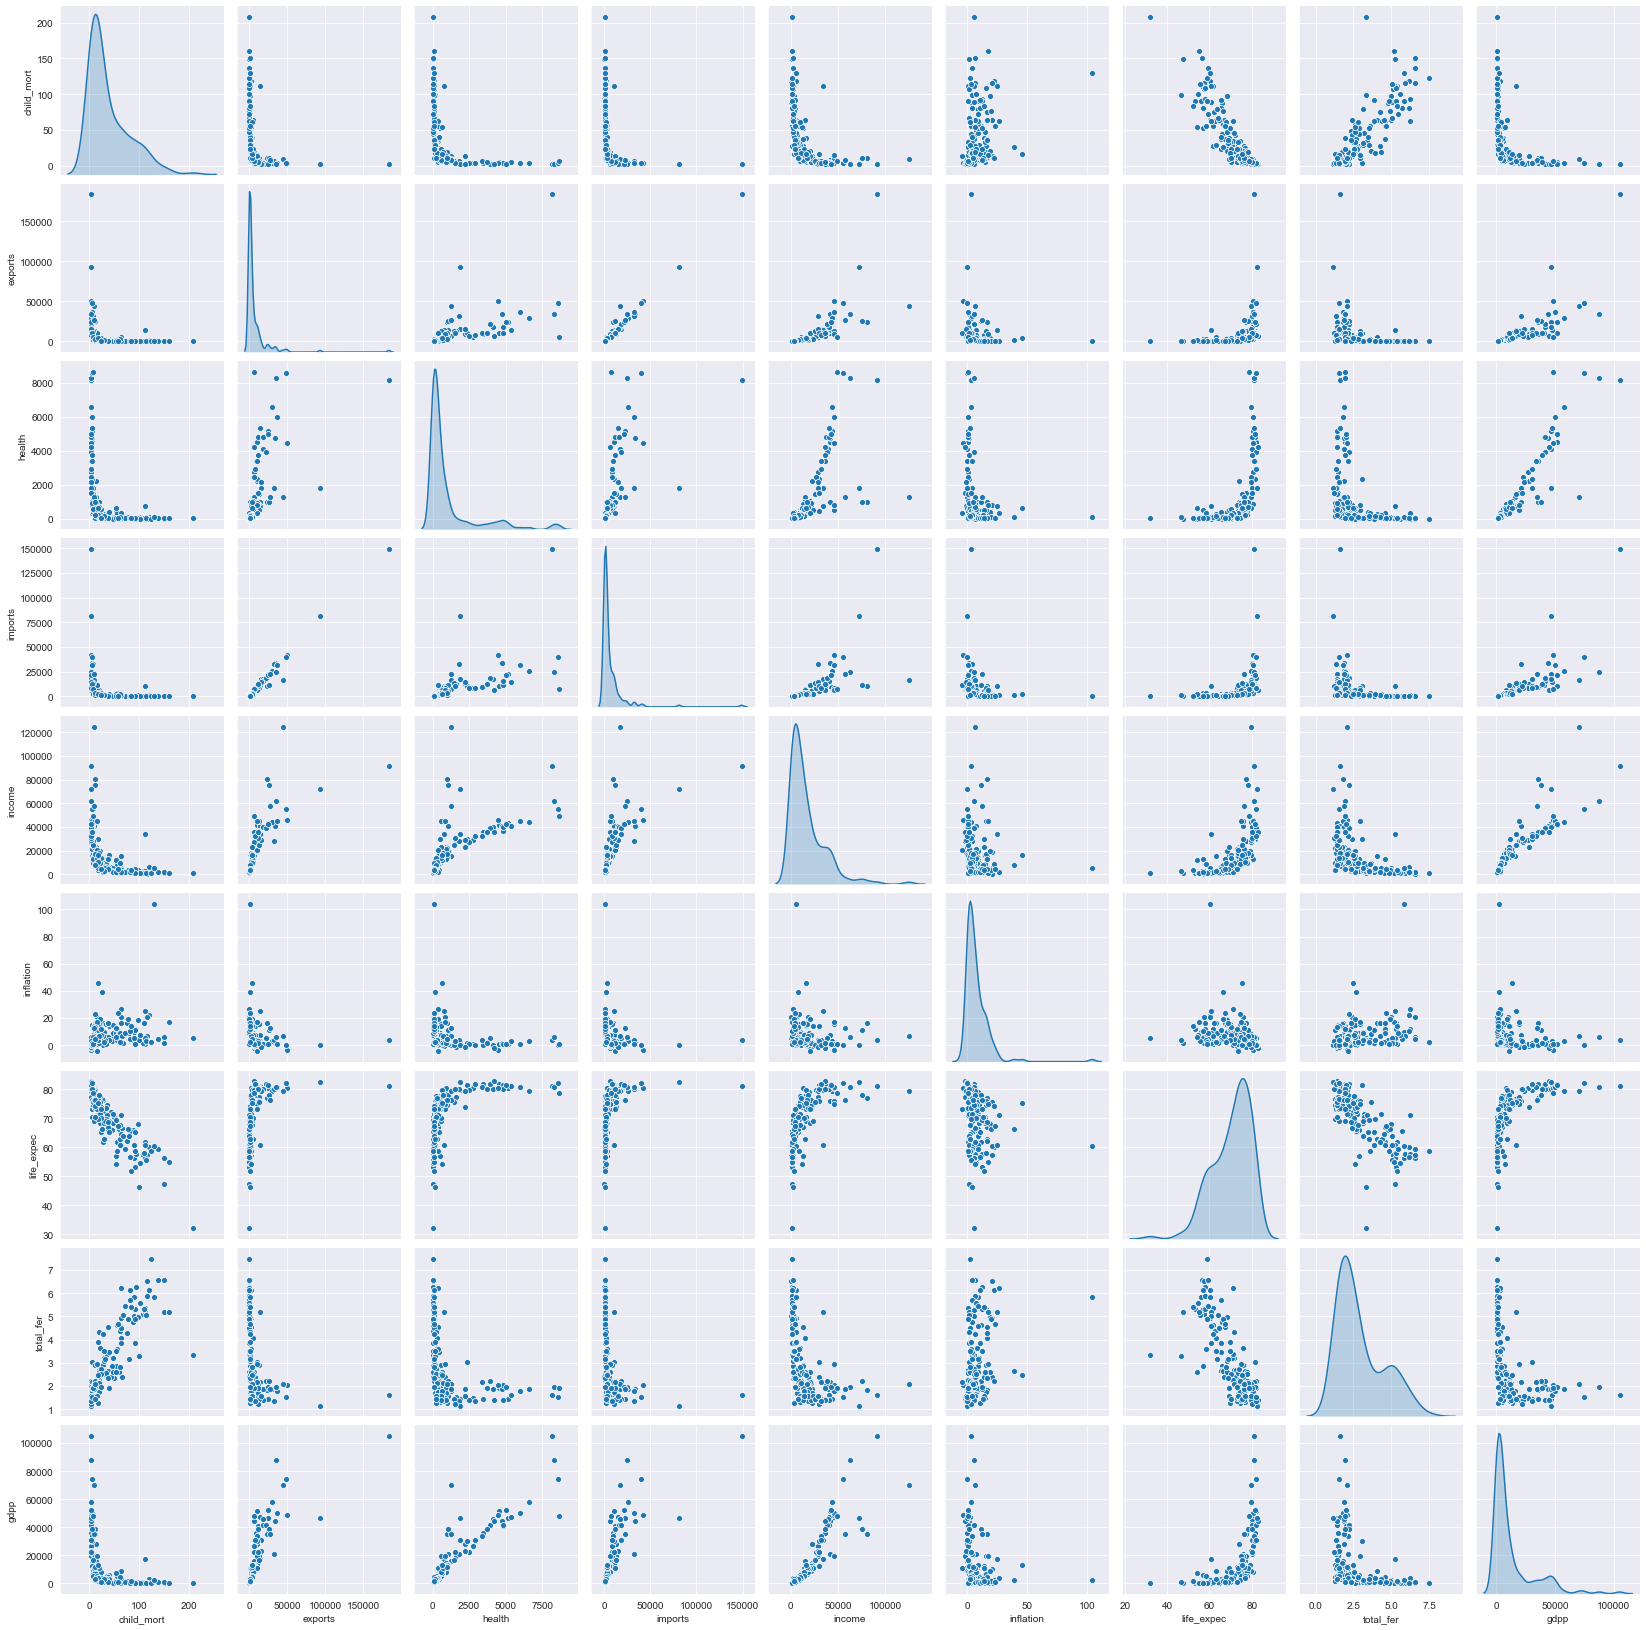

In [17]:
sns.pairplot(kmeansData,diag_kind="kde")
plt.show()

### Correlations between the data

In [18]:
corr = kmeansData.corr()
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

child_mort  exports    health   imports    income  inflation  \
child_mort         NaN -0.29723 -0.430438 -0.319138 -0.524315   0.288276   
exports            NaN      NaN  0.612919  0.987686  0.725351  -0.141553   
health             NaN      NaN       NaN  0.638581  0.690857  -0.253956   
imports            NaN      NaN       NaN       NaN  0.672056  -0.179458   
income             NaN      NaN       NaN       NaN       NaN  -0.147756   
inflation          NaN      NaN       NaN       NaN       NaN        NaN   
life_expec         NaN      NaN       NaN       NaN       NaN        NaN   
total_fer          NaN      NaN       NaN       NaN       NaN        NaN   
gdpp               NaN      NaN       NaN       NaN       NaN        NaN   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.377694  -0.291096  0.768894  
health        0.545626  -0.407984  0.916593  
imports       0.397515  -0.317061  0.755114  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec         NaN  -0.760875  0.600089  
total_fer          NaN        NaN -0.454910  
gdpp               NaN        NaN       NaN

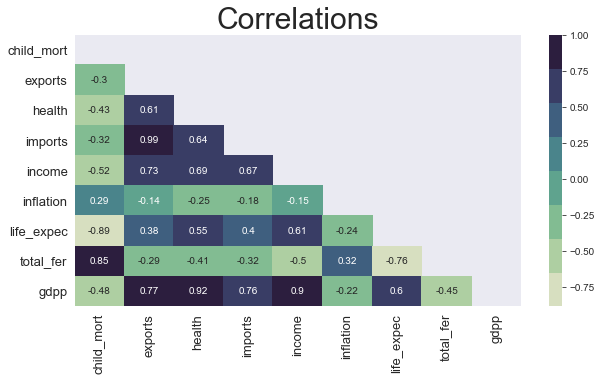

In [19]:
plt.figure(figsize=[10,5])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True,mask=mask,cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title("Correlations",fontsize=30)
plt.show()


#### On anaysing the there are some variable with high correlation but data looks pretty realistic so we will not remove any variables and will perform transformation so that we can reduce the variance and improve the performance of the model 

### Power transformation to reduce the variance and make the data more normally distributed

In [20]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
kmeansData_transformed = pd.DataFrame(pt.fit_transform(kmeansData))
kmeansData_transformed.columns= kmeansData.columns

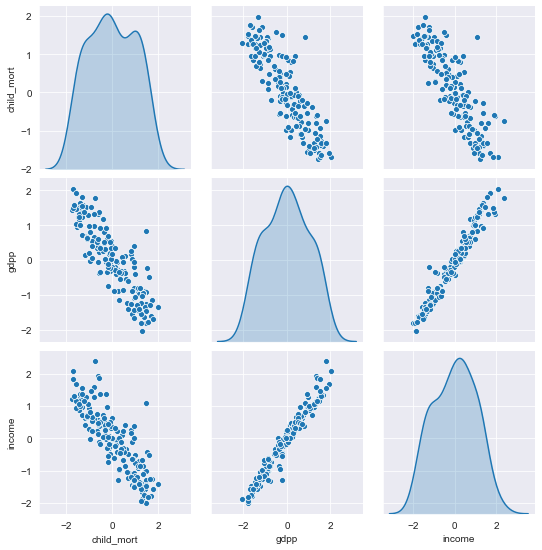

In [21]:
sns.pairplot(kmeansData_transformed,vars=['child_mort','gdpp','income'],diag_kind='kde',)
plt.show()

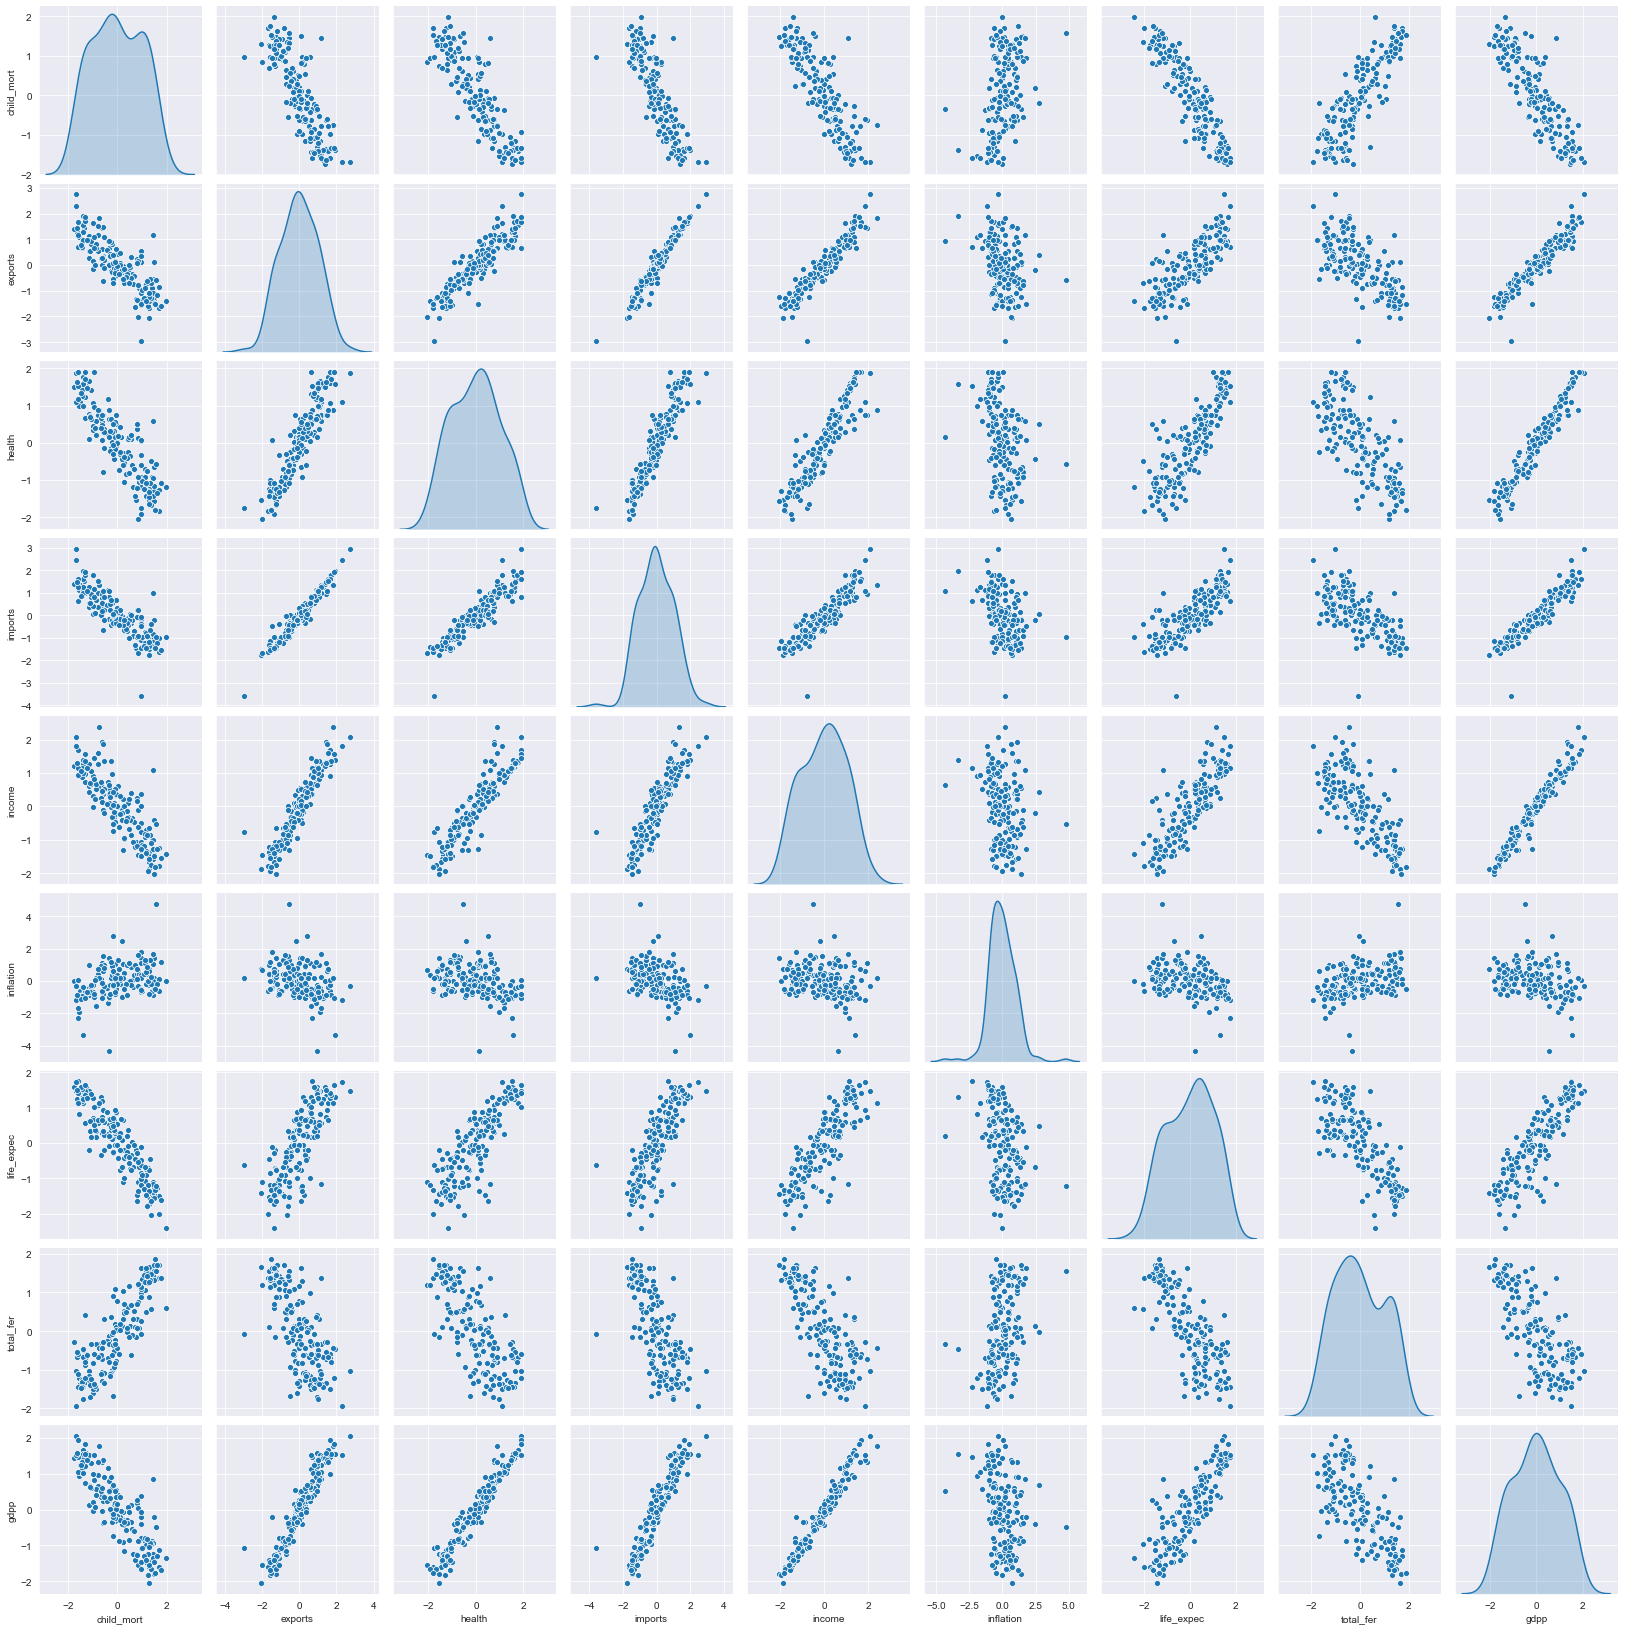

In [22]:
sns.pairplot(kmeansData_transformed,diag_kind='kde')
plt.show()

#### The data seems more clear and the correlation can be easily verified now

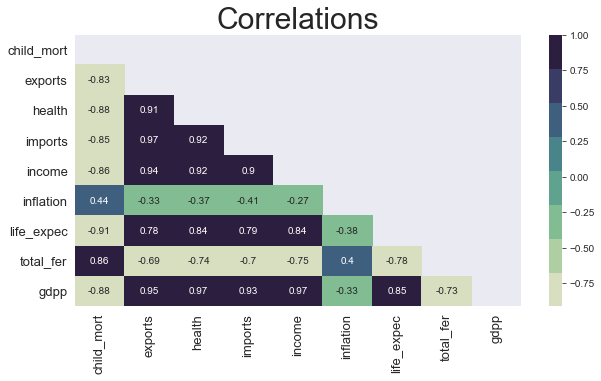

In [23]:
corr = kmeansData_transformed.corr()
corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
plt.figure(figsize=[10,5])
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True,mask=mask,cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))
plt.xticks(fontsize=13,rotation=90)
plt.yticks(fontsize=13)
plt.title("Correlations",fontsize=30)
plt.show()


## Box Plot of the trasformed data

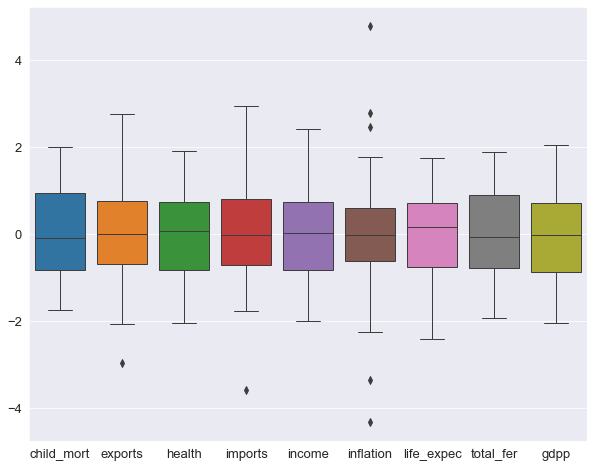

In [24]:
plt.figure(figsize = (10,8))  
sns.boxplot(data=kmeansData_transformed,linewidth=1)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

__The outliers in the data has significantly reduced and now we can use this data for the clustering.__ 

# Kmeans

### Finding Optimal number of clusters

#### Elbow Method
- The elbow method helps to select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point.

- We will use clusters starting from 2 to 10

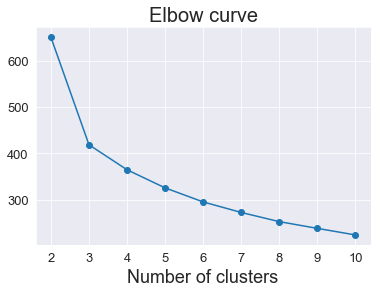

In [25]:
wss = [] #within-cluster distance sum-of-squares
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
for num_clusters in range_n_clusters:
    kmeans =  KMeans( num_clusters,random_state=13,n_init=50,init='k-means++')
    kmeans.fit(kmeansData_transformed)
    
    wss.append(kmeans.inertia_)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Number of clusters',fontsize = 18)
plt.title('Elbow curve',fontsize=20)
plt.plot(range_n_clusters,wss,"-o")
plt.show()

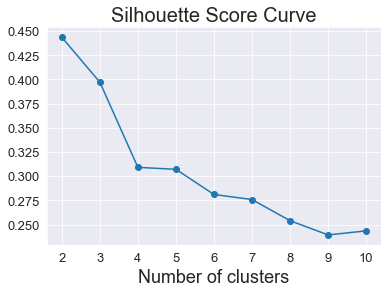

In [26]:
silhouette_avg_list=[] #list conataining silhouette score of different k-values
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,random_state=13,n_init=50,init='k-means++')
    kmeans.fit(kmeansData_transformed)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg=silhouette_score(kmeansData_transformed, cluster_labels)
    silhouette_avg_list.append(silhouette_avg)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Number of clusters',fontsize = 18)
plt.title('Silhouette Score Curve',fontsize=20)
plt.plot(range_n_clusters,silhouette_avg_list,'-o')
plt.show()


#### We can see that the optimal number of clusters that we can use are 2 ( from Silhouette score ) or 3 ( from elbow curve ).

#### k = 2

In [27]:
kmeans = KMeans(n_clusters=2,random_state=15,n_init=50,init='k-means++')
kmeans.fit(kmeansData_transformed)
kmeans.labels_

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [28]:
# assign the label to the data
finalData_transformed = pd.concat([country_data[['country']],kmeansData_transformed],axis=1)
finalData_transformed['cluster_id'] =kmeans.labels_
finalData_transformed.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           0  
3   1.512843   -1.239045   1.623128 -0.219666           0  
4  -0.723442    0.699553  -0.368063  0.609228           1

### Visualising the groups to get a clear picture

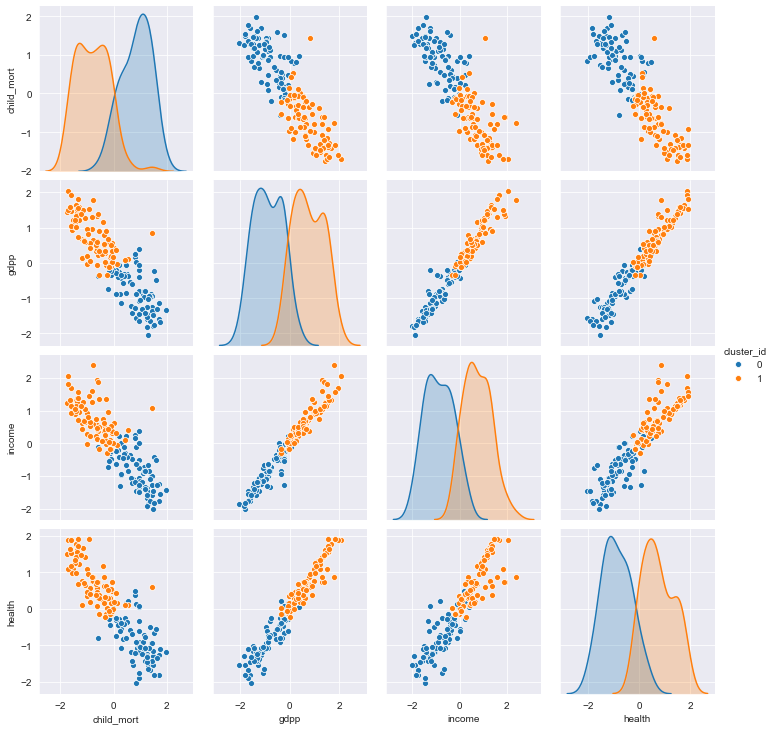

In [29]:
sns.pairplot(finalData_transformed,vars=['child_mort','gdpp','income','health'],diag_kind='kde',hue='cluster_id')
plt.show()

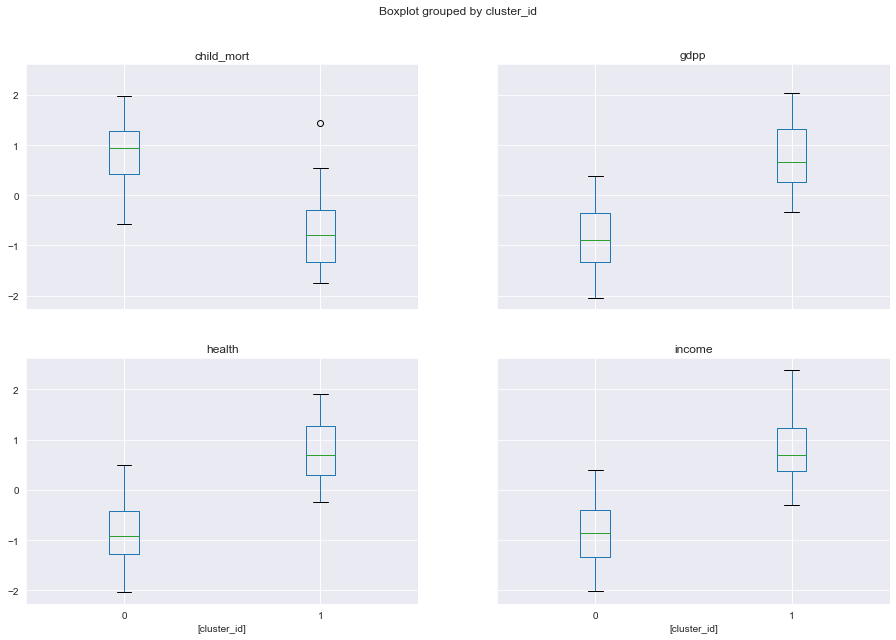

In [30]:
finalData_transformed[['child_mort','gdpp','income',
                      'cluster_id','health']].boxplot(by = 'cluster_id',layout=(2,2), figsize=(15, 10))
plt.show()

#### k = 3

In [31]:
kmeans = KMeans(n_clusters=3,random_state=15,n_init=50,init='k-means++')
kmeans.fit(kmeansData_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=15, tol=0.0001, verbose=0)

In [32]:
kmeans.labels_

array([0, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0])

In [33]:
# assign the label to the data
finalData_transformed = pd.concat([country_data[['country']],kmeansData_transformed],axis=1)
finalData_transformed['cluster_id'] =kmeans.labels_
finalData_transformed.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           1  
3   1.512843   -1.239045   1.623128 -0.219666           0  
4  -0.723442    0.699553  -0.368063  0.609228           2

In [34]:
finalData_transformed.cluster_id.value_counts()

1    70
0    50
2    47
Name: cluster_id, dtype: int64

In [35]:
# creating custome color scheme
customPalette = sns.color_palette(['#DE1E00','#00A50E','#2A65FB'])

### Visualising the groups to get a clear picture

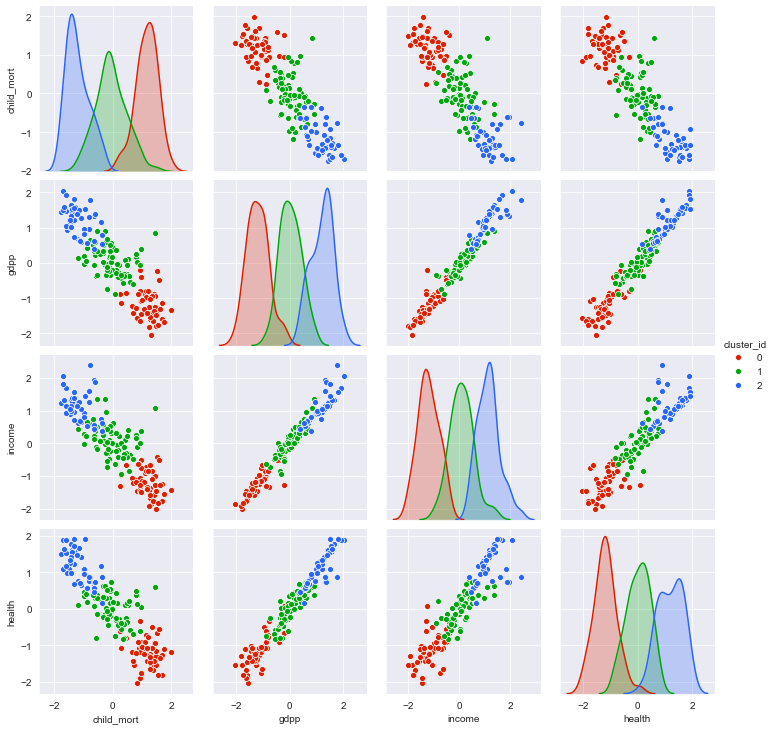

In [36]:
sns.pairplot(finalData_transformed,vars=['child_mort','gdpp','income','health'],diag_kind='kde',hue='cluster_id',palette=customPalette)
plt.show()

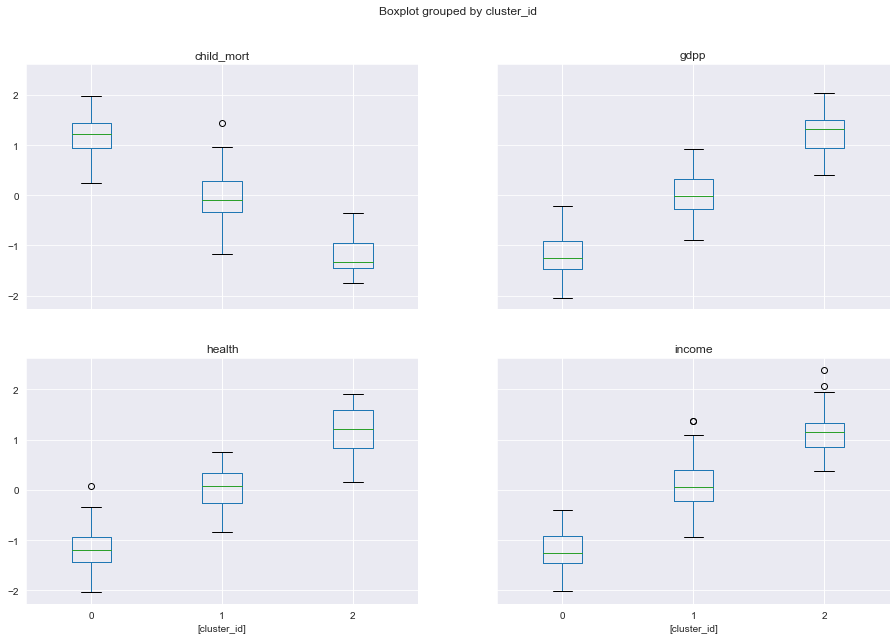

In [37]:
finalData_transformed[['child_mort','gdpp','income',
                      'cluster_id','health']].boxplot(by = 'cluster_id',layout=(2,2), figsize=(15, 10))
plt.show()

__We will go with 3 clusters as there is clear distinction between the groups and the kink is when k is 3, also we can use this to label countries into under-developed, developing & developed categories.__

__We can see there is clear relationship between the gdpp, income, child_mort & health. Higher the gdpp, higher the income, higher the total spending on the health related areas and lower the child_mort rate.__

__Group 0 has the lowest spread of income, gdpp, health and highest child deaths compared to other groups, so the countries belonging to this group needs to be looked into first.__

### Complete data 

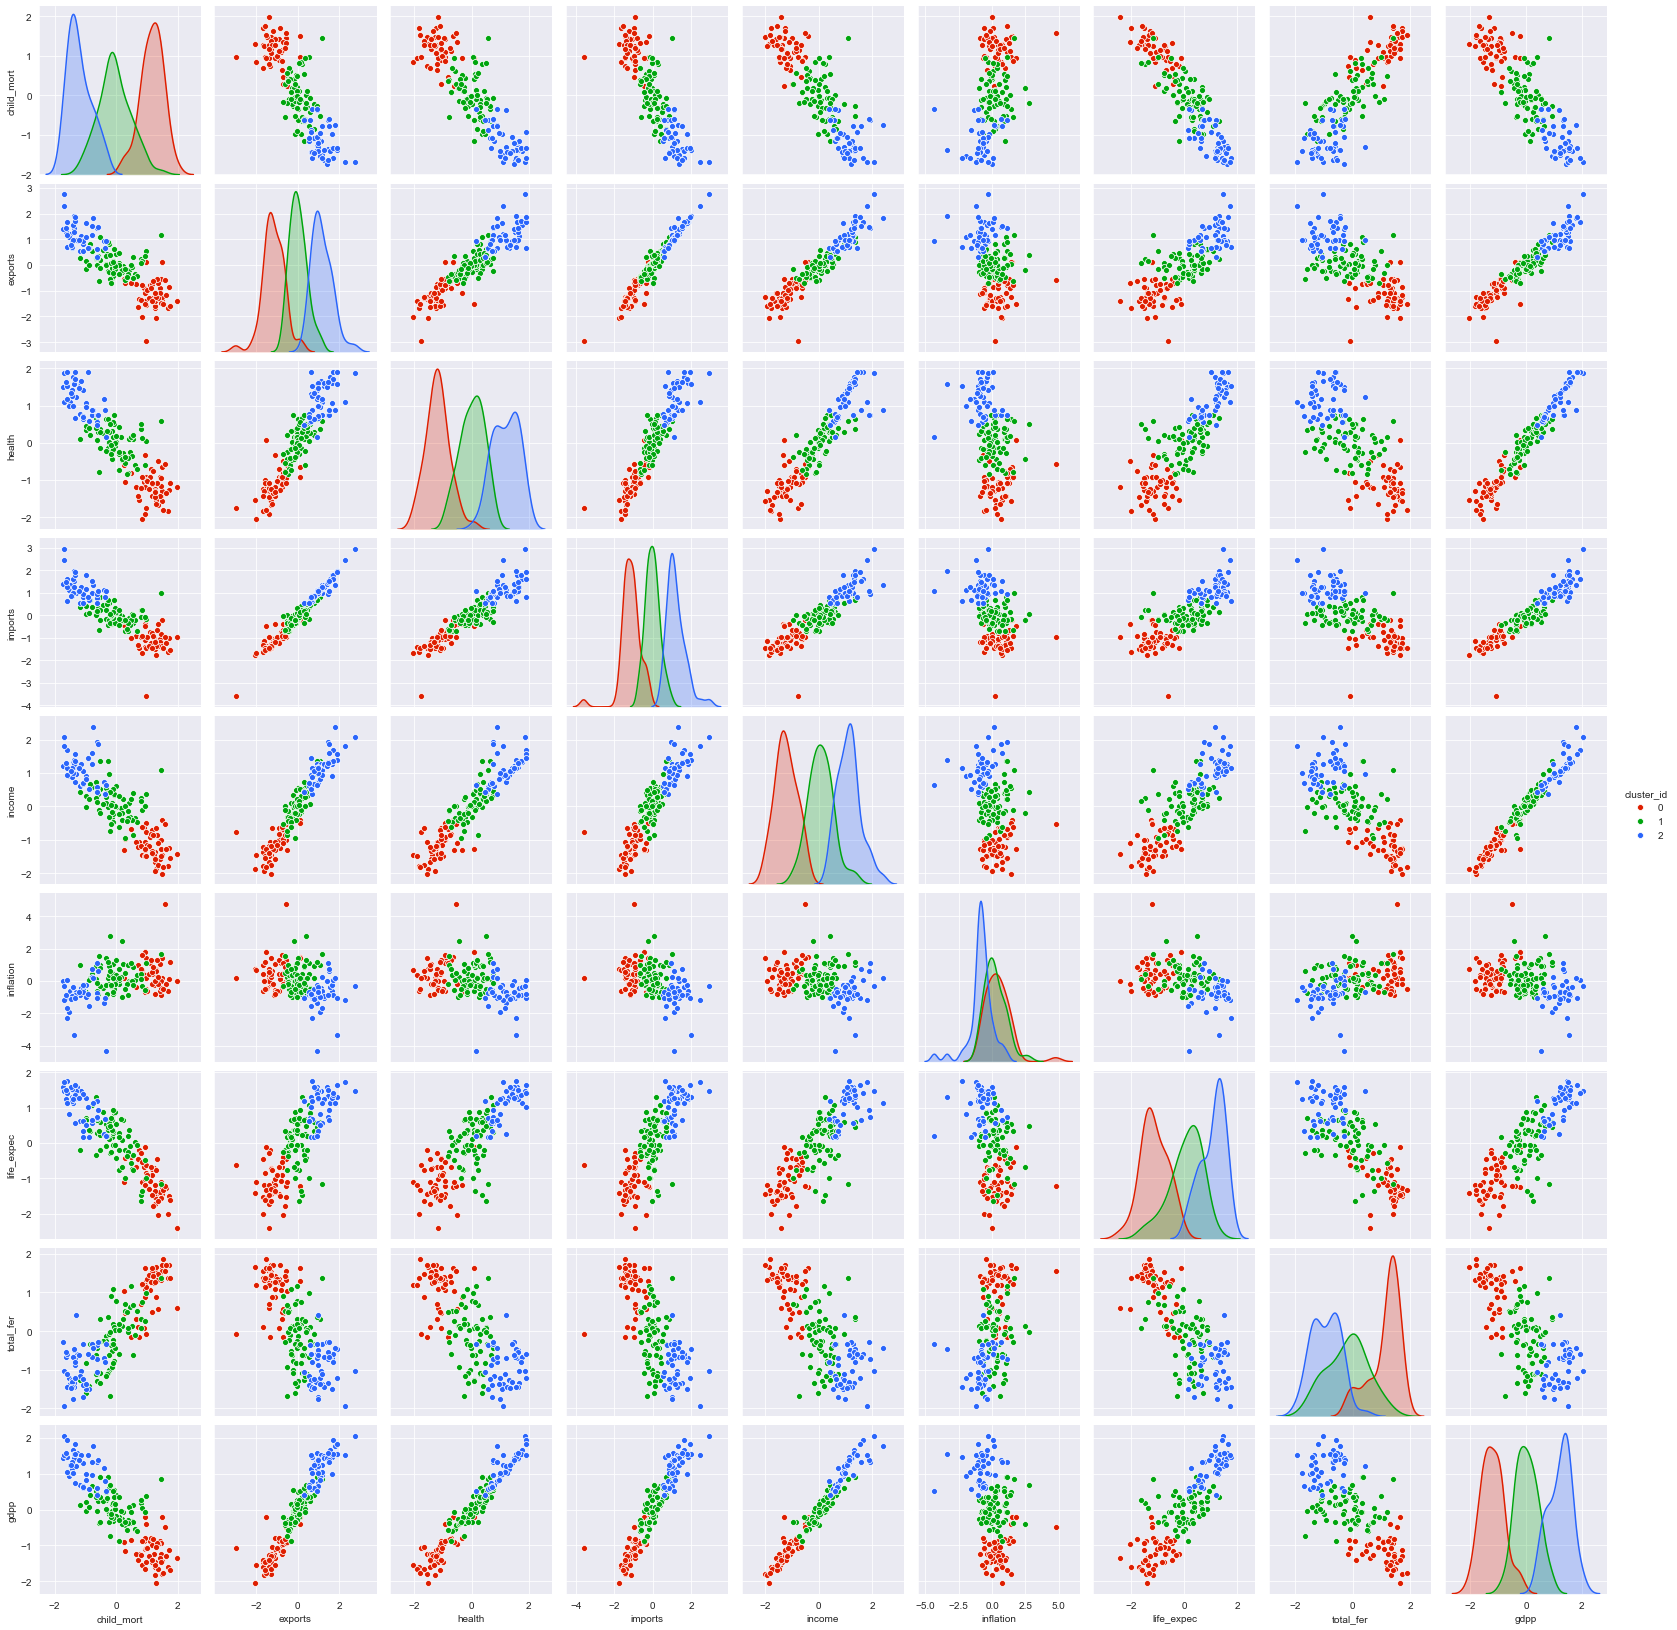

In [38]:
sns.pairplot(finalData_transformed,diag_kind='kde',hue='cluster_id',palette=customPalette)
plt.show()

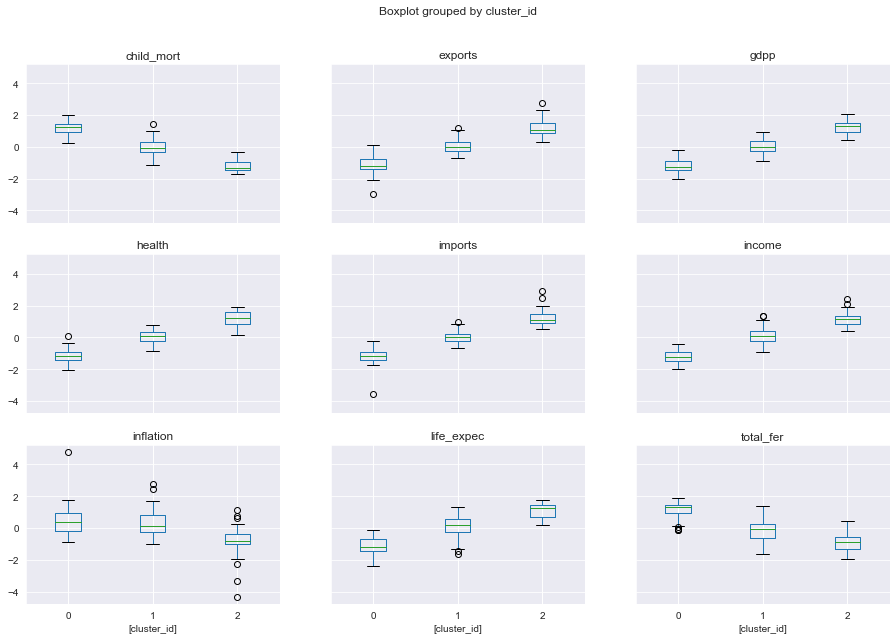

In [39]:
finalData_transformed.boxplot(by = 'cluster_id',layout=(3,3), figsize=(15, 10))
plt.show()

### Assigning the groups to the raw data

In [40]:
original_data_with_groups_kmeans = country_data.copy(deep=True)#creating deep copy of the original data
original_data_with_groups_kmeans['cluster_id'] =kmeans.labels_
original_data_with_groups_kmeans.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           1  
2      16.10        76.5       2.89   4460           1  
3      22.40        60.1       6.16   3530           0  
4       1.44        76.8       2.13  12200           2

In [41]:
original_data_with_groups_kmeans.cluster_id.value_counts()

1    70
0    50
2    47
Name: cluster_id, dtype: int64

#### Group 0 ( Under-Developed )

In [42]:
original_data_with_groups_kmeans[original_data_with_groups_kmeans.cluster_id==0].describe()

child_mort      exports      health      imports       income  \
count   50.000000    50.000000   50.000000    50.000000    50.000000   
mean    88.116000   305.617950   57.722802   415.885242  2314.660000   
std     35.749973   441.119648   50.134655   350.721930  1302.425486   
min     28.100000     1.076920   12.821200     0.651092   609.000000   
25%     62.625000   101.400750   31.296600   181.328500  1395.000000   
50%     85.650000   150.912000   45.194500   292.389000  1900.000000   
75%    110.500000   391.362500   66.567250   451.015000  2992.500000   
max    208.000000  2331.740000  328.320000  1514.370000  5900.000000   

       inflation  life_expec  total_fer         gdpp  cluster_id  
count   50.00000   50.000000   50.00000    50.000000        50.0  
mean    11.50370   60.544000    4.76960   998.880000         0.0  
std     14.93474    6.948621    1.25499   721.759688         0.0  
min      0.88500   32.100000    2.33000   231.000000         0.0  
25%      4.18750   57.350000    3.94750   555.250000         0.0  
50%      8.88500   60.750000    5.00000   763.500000         0.0  
75%     14.82500   65.800000    5.52750  1272.500000         0.0  
max    104.00000   71.100000    7.49000  3600.000000         0.0

In [43]:
original_data_with_groups_kmeans[original_data_with_groups_kmeans.cluster_id==0].country.values

array(['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'India', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar',
       'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Solomon Islands', 'Sudan', 'Tajikistan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Uzbekistan', 'Yemen',
       'Zambia'], dtype=object)

#### Group 1 ( Developing )

In [44]:
original_data_with_groups_kmeans[original_data_with_groups_kmeans.cluster_id==1].describe()

child_mort       exports       health       imports        income  \
count   70.000000     70.000000    70.000000     70.000000     70.000000   
mean    24.377143   2639.129571   377.538386   2571.104571  12613.285714   
std     17.038100   2638.355586   243.110829   1748.545887   8079.033828   
min      5.500000    440.200000    76.893000    679.140000   2950.000000   
25%     14.675000   1098.077500   189.878250   1469.632500   7440.000000   
50%     19.150000   1775.220000   330.084500   2199.175000  10450.000000   
75%     29.175000   3128.375000   503.782500   3134.907500  15400.000000   
max    111.000000  14671.800000  1026.840000  10071.900000  45400.000000   

       inflation  life_expec  total_fer          gdpp  cluster_id  
count  70.000000   70.000000  70.000000     70.000000        70.0  
mean    8.895729   72.015714   2.462714   6175.857143         1.0  
std     8.252555    5.223321   0.813076   3948.887017         0.0  
min     0.480000   54.300000   1.270000   1310.000000         1.0  
25%     3.710000   69.900000   1.890000   3222.500000         1.0  
50%     6.460000   73.450000   2.395000   4850.000000         1.0  
75%    13.075000   75.800000   2.805000   8060.000000         1.0  
max    45.900000   80.400000   5.210000  19300.000000         1.0

#### Group 2 ( Developed )

In [45]:
original_data_with_groups_kmeans[original_data_with_groups_kmeans.cluster_id==2].describe()

child_mort        exports       health        imports         income  \
count   47.000000      47.000000    47.000000      47.000000      47.000000   
mean     5.934043   22111.135745  3131.076979   19137.940851   39670.212766   
std      3.109822   29066.467808  2331.505171   23438.147391   21276.890044   
min      2.600000    3171.880000   367.200000    5143.500000   15300.000000   
25%      3.900000    8428.800000  1160.015000    8925.500000   26200.000000   
50%      4.500000   12665.800000  2334.780000   11704.000000   36200.000000   
75%      7.150000   24874.850000  4640.835000   19673.700000   43600.000000   
max     14.400000  183750.000000  8663.600000  149100.000000  125000.000000   

       inflation  life_expec  total_fer           gdpp  cluster_id  
count  47.000000   47.000000  47.000000      47.000000        47.0  
mean    2.163404   79.031915   1.732766   35803.404255         2.0  
std     3.779810    2.728999   0.356058   20728.080647         0.0  
min    -4.210000   73.100000   1.150000    8860.000000         2.0  
25%     0.320000   76.750000   1.435000   20250.000000         2.0  
50%     1.160000   80.000000   1.720000   35000.000000         2.0  
75%     3.015000   81.150000   1.940000   46750.000000         2.0  
max    16.700000   82.800000   3.030000  105000.000000         2.0

# Hierarchical Clustering

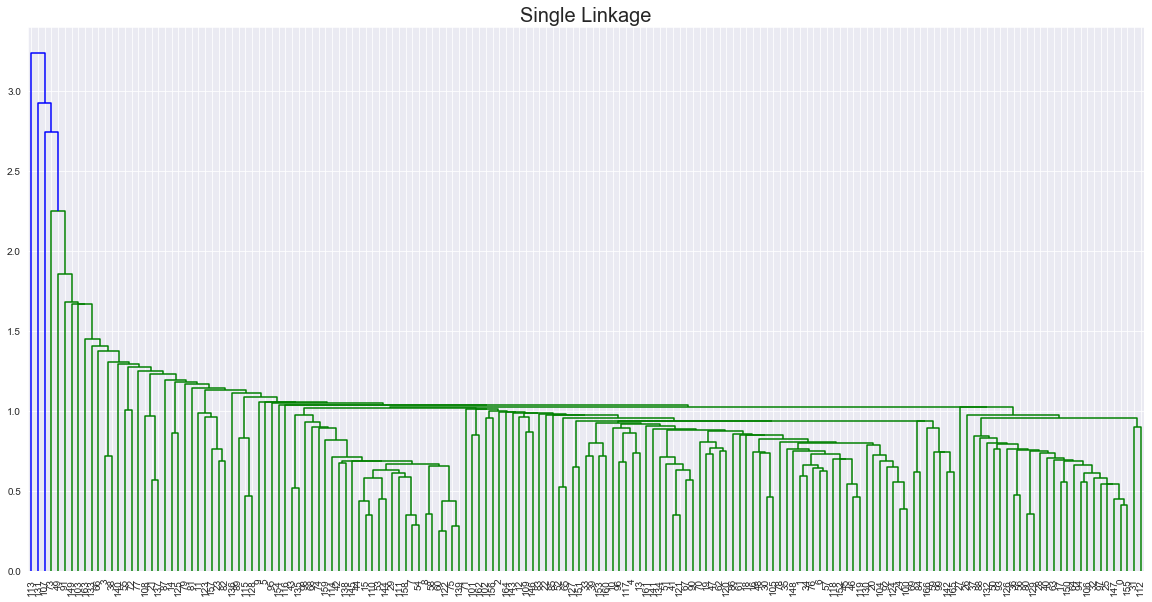

In [46]:
# single linkage
plt.figure(figsize=(20,10))
Z = linkage(kmeansData_transformed,'single',metric='euclidean')
plt.title('Single Linkage',fontsize=20)
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10)
plt.show()

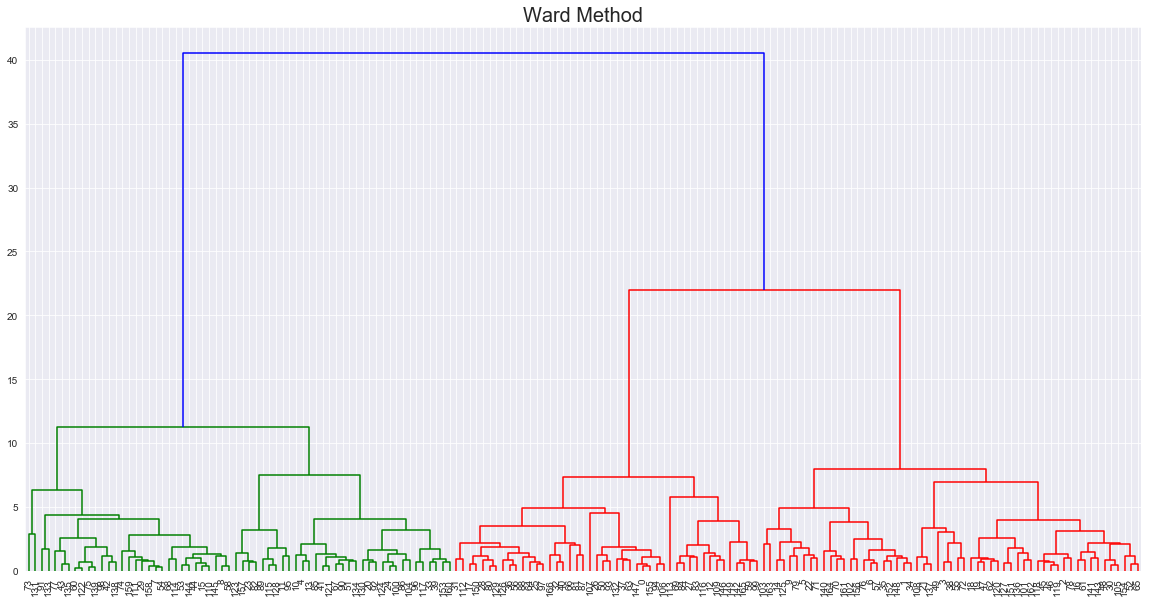

In [47]:
# ward mehod
plt.figure(figsize=(20,10))
Z = linkage(kmeansData_transformed,'ward',metric='euclidean')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10)
plt.title('Ward Method',fontsize=20)
plt.show()

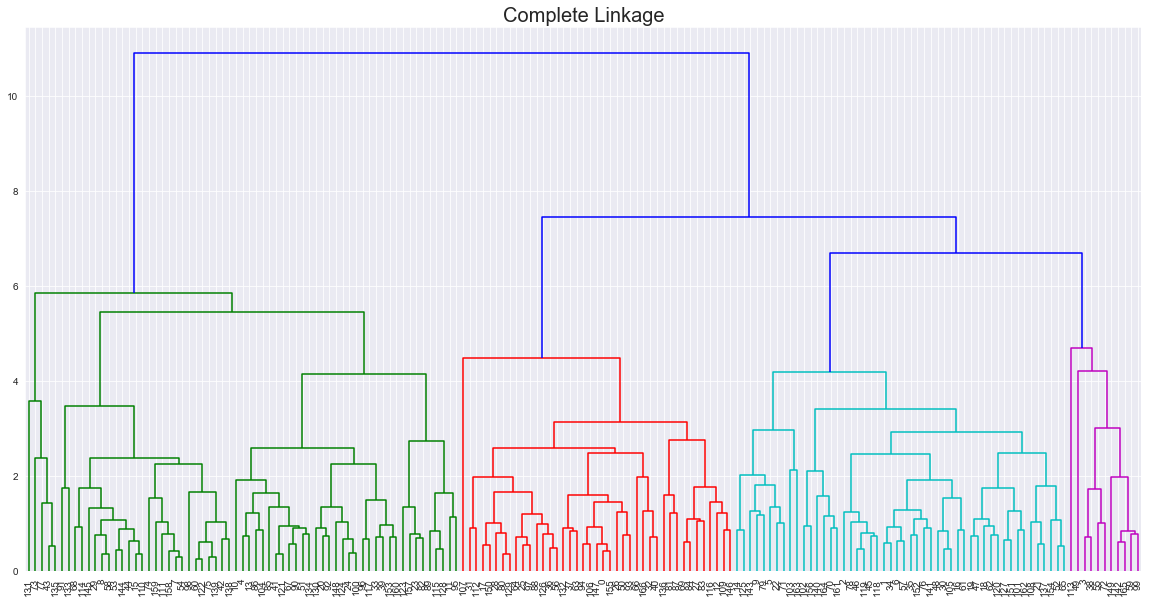

In [48]:
# complete linkage
plt.figure(figsize=(20,10))
Z = linkage(kmeansData_transformed,'complete',metric='euclidean')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,color_threshold=6)
plt.title('Complete Linkage',fontsize=20)
plt.show()

__We will go with 4 clusters as looking at the bigger picture we can see 4 clusters__

In [49]:
# 4 clusters
cluster_labels = cut_tree(Z, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 1,
       1, 3, 3, 0, 0, 0, 0, 3, 1, 0, 0, 3, 1, 1, 0, 0, 2, 3, 0, 3, 3, 3,
       3, 1, 1, 1, 1, 2, 0, 3, 1, 3, 3, 2, 0, 1, 3, 2, 3, 1, 1, 0, 0, 1,
       0, 3, 3, 0, 1, 1, 2, 3, 3, 3, 1, 3, 1, 1, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 2, 3, 1, 1, 1, 3, 1, 0, 0, 1, 0,
       3, 3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 1, 0, 1, 3, 0, 3, 3,
       0, 3, 3, 3, 0, 1, 3, 3, 1, 1, 2, 1, 3, 3, 0, 0, 3, 2, 0, 1, 1, 3,
       1, 0, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 0])

In [50]:
# assign the label
finalData_dendo = pd.concat([country_data[['country']],kmeansData_transformed],axis=1)
finalData_dendo['cluster_id'] =cluster_labels
finalData_dendo.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           1  
3   1.512843   -1.239045   1.623128 -0.219666           2  
4  -0.723442    0.699553  -0.368063  0.609228           3

In [51]:
finalData_dendo['cluster_id'].value_counts()

3    65
1    50
0    41
2    11
Name: cluster_id, dtype: int64

### Visualising the data

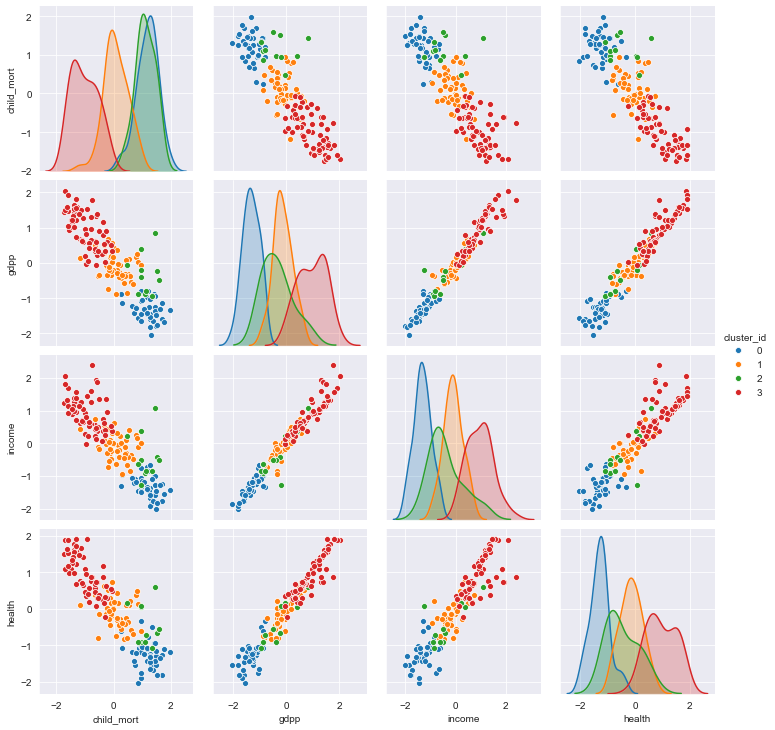

In [52]:
sns.pairplot(finalData_dendo,vars=['child_mort','gdpp','income','health'],diag_kind='kde',hue='cluster_id')
plt.show()

__Group 2 is merging into other groups and there are total 11 countries that all under this group next we will use 3 as total number of groups.__

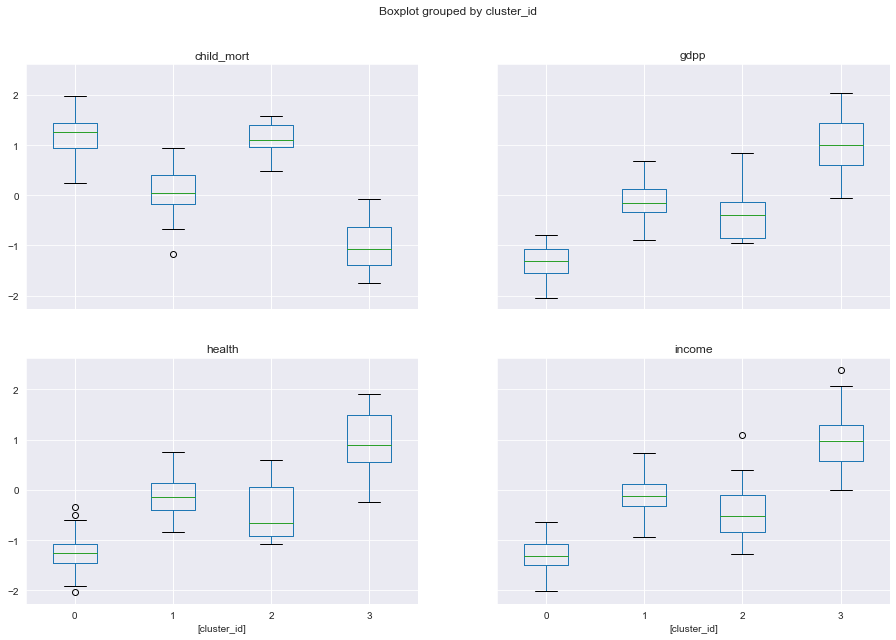

In [53]:
finalData_dendo[['child_mort','gdpp','income',
                      'cluster_id','health']].boxplot(by = 'cluster_id',layout=(2,2), figsize=(15, 10))
plt.show()

#### Now we will check with number of clusters as 3

In [54]:
# 3 clusters
cluster_labels = cut_tree(Z, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0])

In [55]:
# assign the label
finalData_dendo = pd.concat([country_data[['country']],kmeansData_transformed],axis=1)
finalData_dendo['cluster_id'] =cluster_labels
finalData_dendo.head()

country  child_mort   exports    health   imports    income  \
0          Afghanistan    1.266699 -1.658719 -1.239313 -1.246055 -1.368935   
1              Albania   -0.220994 -0.238427 -0.042924 -0.055108  0.012538   
2              Algeria    0.217834 -0.030785 -0.270052 -0.266188  0.232275   
3               Angola    1.506186  0.100544 -0.661987 -0.219429 -0.408251   
4  Antigua and Barbuda   -0.637380  0.602677  0.563269  0.758134  0.572583   

   inflation  life_expec  total_fer      gdpp  cluster_id  
0   0.459416   -1.526455   1.544053 -1.462273           0  
1  -0.154659    0.621738  -0.992833 -0.121133           1  
2   1.059790    0.652698   0.313175 -0.063195           1  
3   1.512843   -1.239045   1.623128 -0.219666           1  
4  -0.723442    0.699553  -0.368063  0.609228           2

In [56]:
finalData_dendo['cluster_id'].value_counts()

2    65
1    61
0    41
Name: cluster_id, dtype: int64

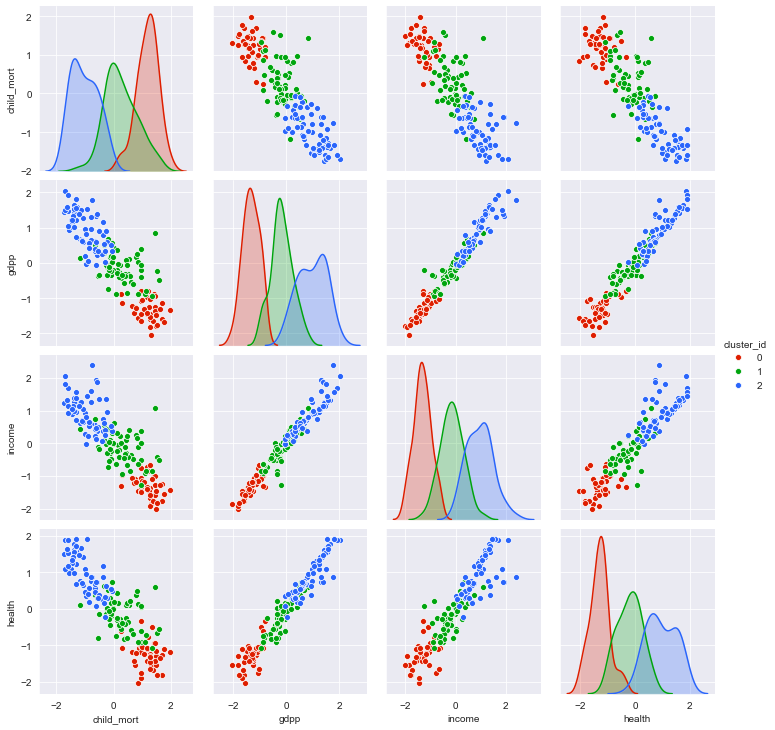

In [57]:
sns.pairplot(finalData_dendo,vars=['child_mort','gdpp','income','health'],diag_kind='kde',hue='cluster_id',palette=customPalette)
plt.show()

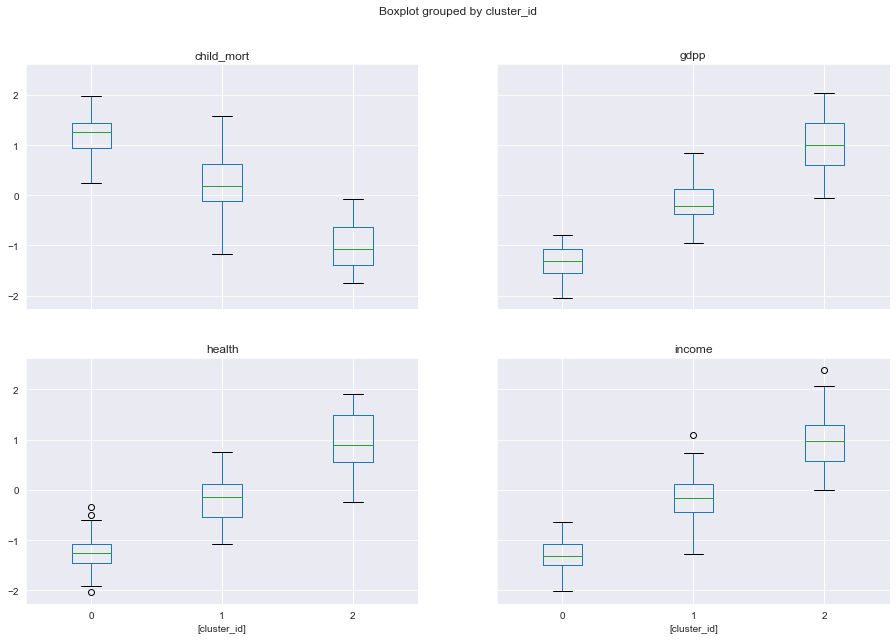

In [58]:
finalData_dendo[['child_mort','gdpp','income',
                      'cluster_id','health']].boxplot(by = 'cluster_id',layout=(2,2), figsize=(15, 10))
plt.show()

__3 clusters looked good as compared to 4 clusters because on removing one group the clusters become distinct.__

__Like k-means there is clear relationship between the gdpp, income, child_mort & health. Higher the gdpp, higher the income, higher the total spending on the health related areas and lower the child_mort rate.__

__Group 0 has the lowest spread of income, gdpp, health and highest child deaths compared to other groups, so the countries belonging to this group needs to be looked into first.__

### Complete Data

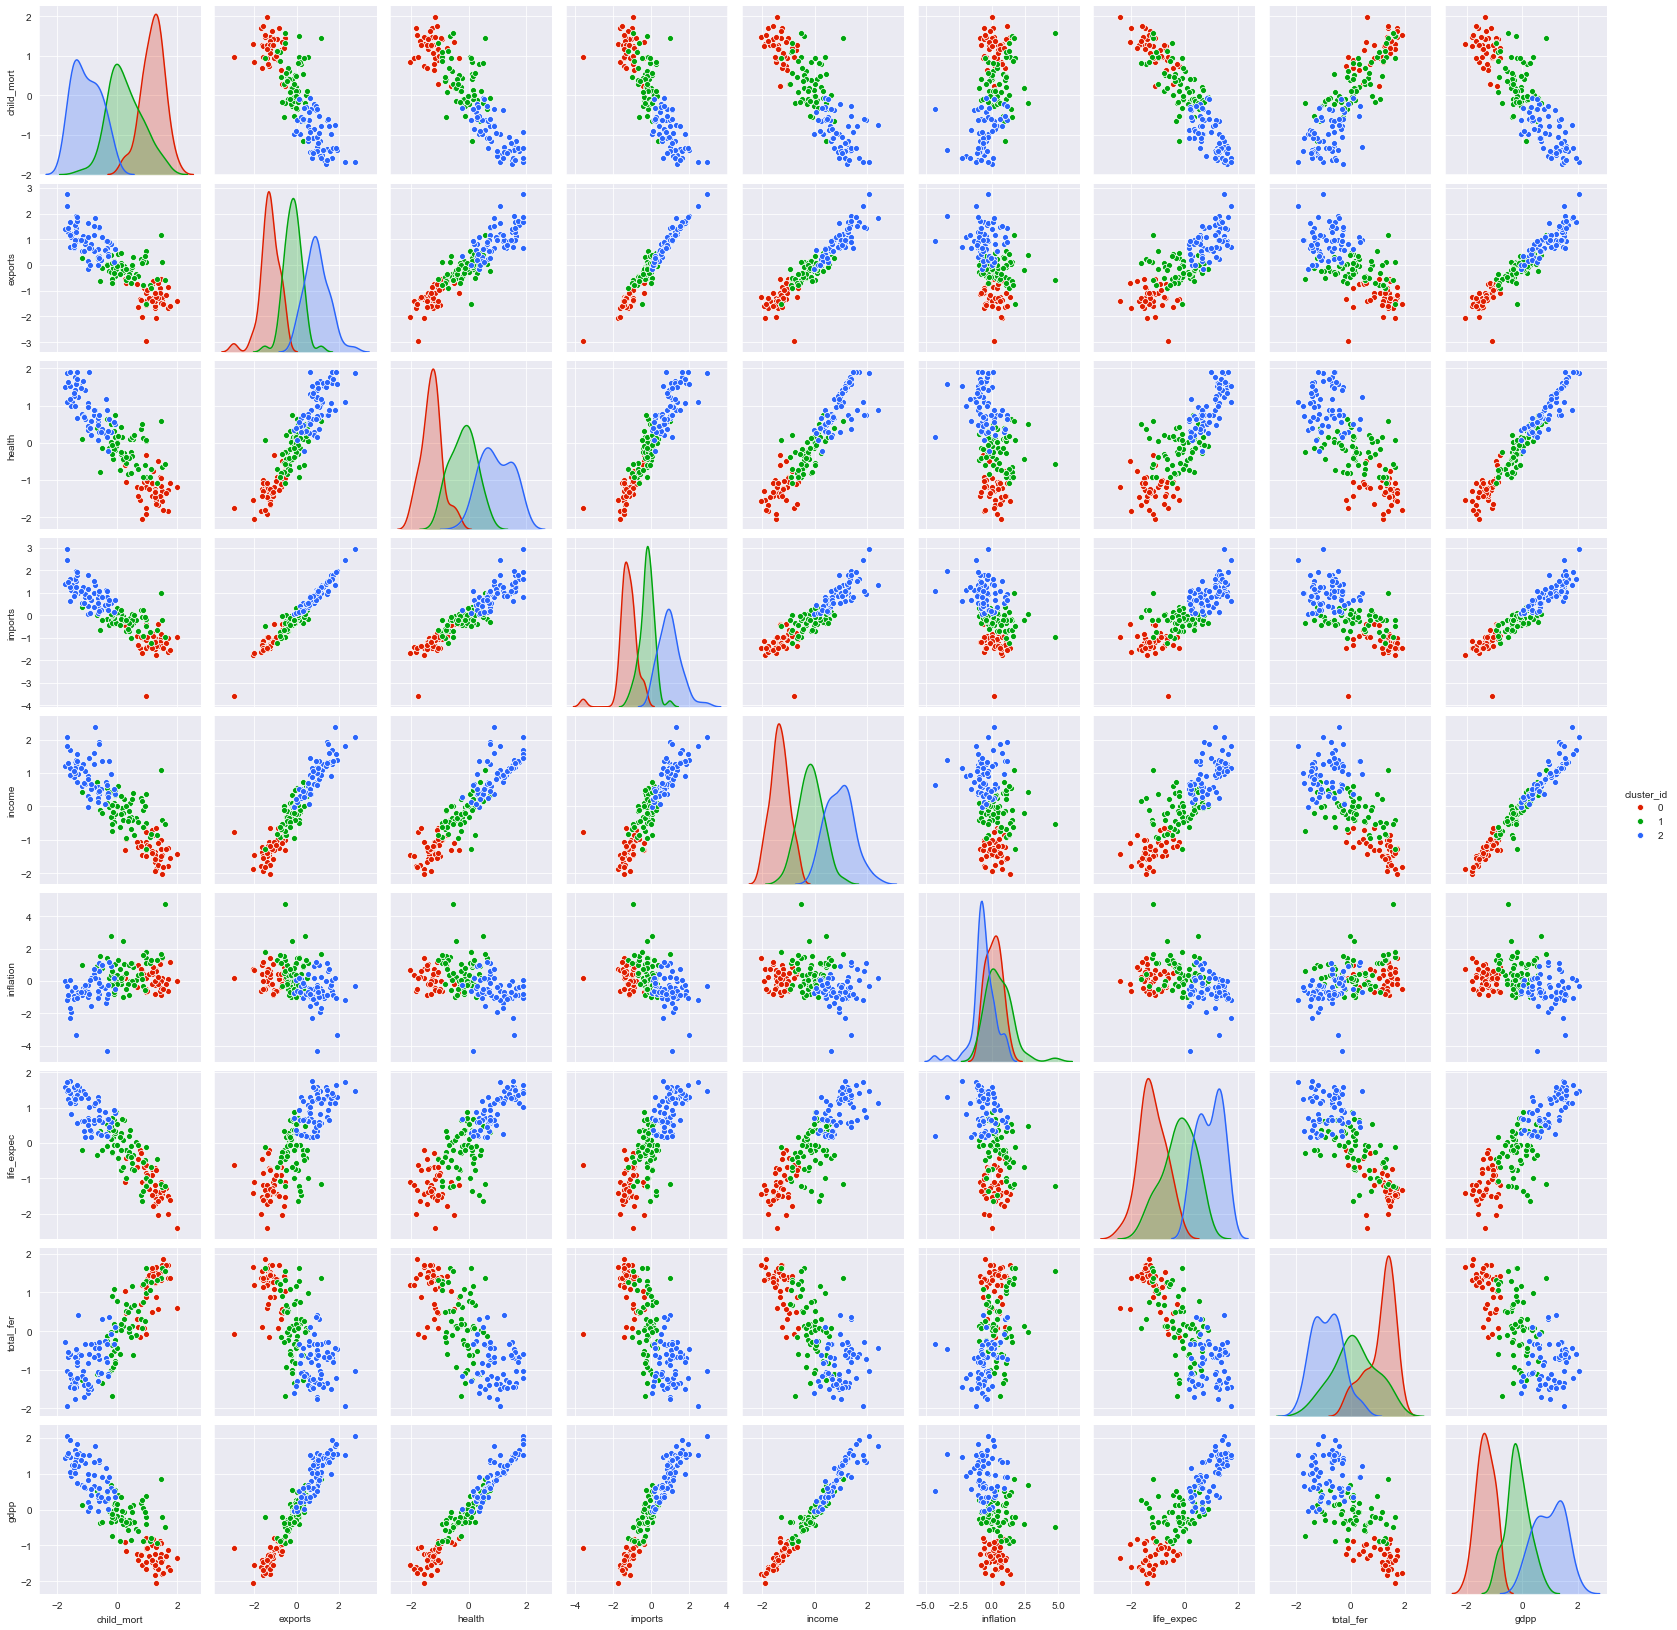

In [59]:
sns.pairplot(finalData_dendo,diag_kind='kde',hue='cluster_id',palette=customPalette)
plt.show()

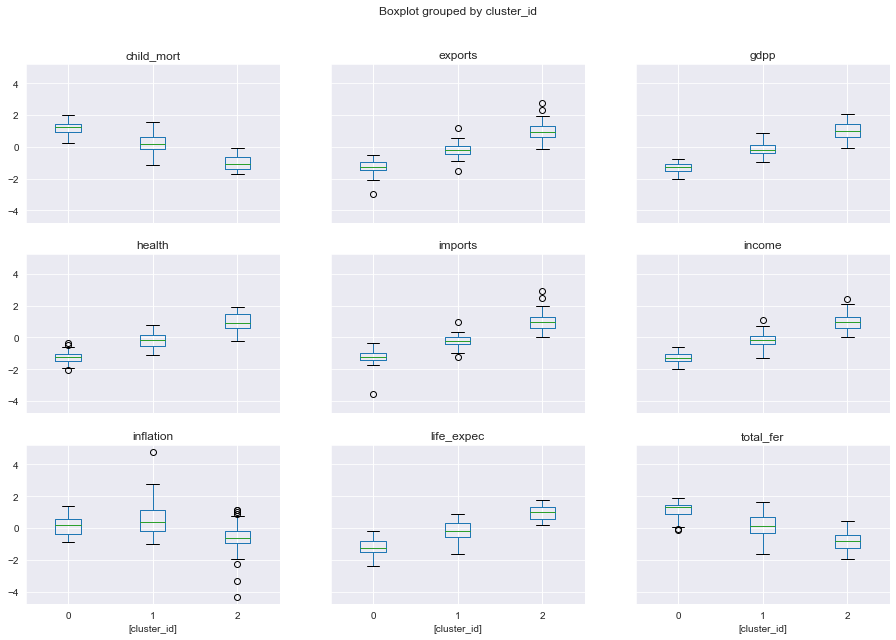

In [60]:
finalData_dendo.boxplot(by = 'cluster_id',layout=(3,3), figsize=(15, 10))
plt.show()

### Assigning the groups to the raw data

In [61]:
original_data_with_groups_dendo = country_data.copy(deep=True)#creating deep copy of the original data
original_data_with_groups_dendo['cluster_id'] =cluster_labels
original_data_with_groups_dendo.head()


country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           0  
1       4.49        76.3       1.65   4090           1  
2      16.10        76.5       2.89   4460           1  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

#### Group 0 ( Under-Developed )

In [62]:
original_data_with_groups_dendo[original_data_with_groups_dendo.cluster_id==0].describe()

child_mort     exports      health      imports       income  \
count   41.000000   41.000000   41.000000    41.000000    41.000000   
mean    89.973171  194.253842   46.556246   340.017124  1931.048780   
std     36.893197  164.331954   30.503072   269.543962   956.986362   
min     28.100000    1.076920   12.821200     0.651092   609.000000   
25%     62.700000   81.503000   30.248100   170.200000  1350.000000   
50%     89.300000  131.985000   40.634100   248.508000  1730.000000   
75%    111.000000  249.000000   53.609500   403.000000  2440.000000   
max    208.000000  635.970000  168.370000  1190.510000  4410.000000   

       inflation  life_expec  total_fer         gdpp  cluster_id  
count  41.000000   41.000000  41.000000    41.000000        41.0  
mean    7.472805   59.563415   4.735610   757.658537         0.0  
std     4.903664    7.077738   1.281253   337.404550         0.0  
min     0.885000   32.100000   2.330000   231.000000         0.0  
25%     3.120000   56.500000   3.840000   488.000000         0.0  
50%     6.810000   59.500000   5.050000   702.000000         0.0  
75%    10.600000   64.600000   5.430000   988.000000         0.0  
max    20.800000   70.400000   7.490000  1490.000000         0.0

In [63]:
original_data_with_groups_dendo[original_data_with_groups_dendo.cluster_id==0].country

0                   Afghanistan
12                   Bangladesh
17                        Benin
25                 Burkina Faso
26                      Burundi
27                     Cambodia
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
40                Cote d'Ivoire
50                      Eritrea
56                       Gambia
63                       Guinea
64                Guinea-Bissau
66                        Haiti
69                        India
80                        Kenya
81                     Kiribati
83              Kyrgyz Republic
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
106                  Mozambique
107                     Myanmar
109                       Nepal
112                       Niger
116     

#### Group 1 ( Developing )

In [64]:
original_data_with_groups_dendo[original_data_with_groups_dendo.cluster_id==1].describe()

child_mort       exports       health       imports        income  \
count   61.000000     61.000000    61.000000     61.000000     61.000000   
mean    36.163934   1785.262131   275.809475   1814.593770   9415.901639   
std     26.911534   1991.227354   203.480393   1363.867802   5600.721494   
min      5.500000     79.200000    52.920000    254.560000   1850.000000   
25%     18.600000    755.730000   121.160000   1112.500000   5600.000000   
50%     26.100000   1300.140000   225.108000   1534.500000   8000.000000   
75%     42.700000   2090.700000   351.882000   2289.420000  11200.000000   
max    130.000000  14671.800000  1009.120000  10071.900000  33700.000000   

        inflation  life_expec  total_fer          gdpp  cluster_id  
count   61.000000   61.000000  61.000000     61.000000        61.0  
mean    12.844934   69.755738   2.970164   4641.803279         1.0  
std     14.937897    5.443636   1.204766   3108.236643         0.0  
min      0.480000   54.300000   1.270000   1200.000000         1.0  
25%      4.440000   67.200000   2.170000   2830.000000         1.0  
50%      8.550000   70.500000   2.640000   3600.000000         1.0  
75%     16.600000   74.100000   3.500000   5840.000000         1.0  
max    104.000000   77.900000   6.230000  17100.000000         1.0

#### Group  2 ( Developed )

In [65]:
original_data_with_groups_dendo[original_data_with_groups_dendo.cluster_id==2].describe()

child_mort        exports       health        imports         income  \
count   65.000000      65.000000    65.000000      65.000000      65.000000   
mean     7.633846   17267.353077  2426.788631   15009.598154   33994.153846   
std      4.344906   25923.133851  2288.262629   20994.325899   20986.210569   
min      2.600000    1369.170000   197.104000    2364.930000    9720.000000   
25%      4.200000    5551.000000   735.660000    5333.720000   19100.000000   
50%      6.200000   10211.100000  1281.000000    9884.000000   29600.000000   
75%     10.400000   17879.400000  3938.600000   15507.800000   41400.000000   
max     19.700000  183750.000000  8663.600000  149100.000000  125000.000000   

       inflation  life_expec  total_fer           gdpp  cluster_id  
count  65.000000   65.000000  65.000000      65.000000        65.0  
mean    3.225231   78.240000   1.799538   28473.846154         2.0  
std     4.474407    2.838618   0.412608   21364.535281         0.0  
min    -4.210000   73.100000   1.150000    4540.000000         2.0  
25%     0.673000   76.100000   1.470000   11900.000000         2.0  
50%     1.740000   78.700000   1.780000   22100.000000         2.0  
75%     4.080000   80.400000   2.050000   41900.000000         2.0  
max    17.200000   82.800000   3.030000  105000.000000         2.0

### We will go with the hierarchical clustering data.
__In list of under-developed countries provied by the hierarchical clustering, the variables are well organized like low gdpp, low income  & high child_mort as compared to the list given by k-means.__

In [66]:
#creating deep copy of the original data
lowest_group = original_data_with_groups_dendo[original_data_with_groups_dendo.cluster_id==0].copy(deep=True)

### Final list of countries that are in direst need of aid.

In [67]:
lowest_group.sort_values('gdpp',ascending=True)

country  child_mort    exports    health      imports  \
26                    Burundi        93.6   20.60520   26.7960    90.552000   
88                    Liberia        89.3   62.45700   38.5860   302.802000   
37           Congo, Dem. Rep.       116.0  137.27400   26.4194   165.664000   
112                     Niger       123.0   77.25600   17.9568   170.868000   
132              Sierra Leone       160.0   67.03200   52.2690   137.655000   
93                 Madagascar        62.2  103.25000   15.5701   177.590000   
106                Mozambique       101.0  131.98500   21.8299   193.578000   
31   Central African Republic       149.0   52.62800   17.7508   118.190000   
94                     Malawi        90.5  104.65200   30.2481   160.191000   
50                    Eritrea        55.2   23.08780   12.8212   112.306000   
150                      Togo        90.3  196.17600   37.3320   279.624000   
64              Guinea-Bissau       114.0   81.50300   46.4950   192.544000   
0                 Afghanistan        90.2   55.30000   41.9174   248.297000   
56                     Gambia        80.3  133.75600   31.9778   239.974000   
126                    Rwanda        63.6   67.56000   59.1150   168.900000   
25               Burkina Faso       116.0  110.40000   38.7550   170.200000   
109                     Nepal        47.0   56.71360   31.0800   215.488000   
155                    Uganda        81.0  101.74500   53.6095   170.170000   
63                     Guinea       109.0  196.34400   31.9464   279.936000   
66                      Haiti       208.0  101.28600   45.7442   428.314000   
147                  Tanzania        71.9  131.27400   42.1902   204.282000   
97                       Mali       137.0  161.42400   35.2584   248.508000   
146                Tajikistan        52.4  109.96200   44.1324   432.468000   
17                      Benin       111.0  180.40400   31.0780   281.976000   
12                 Bangladesh        49.4  121.28000   26.6816   165.244000   
36                    Comoros        88.2  126.88500   34.6819   397.573000   
27                   Cambodia        44.4  425.22600   44.6448   467.670000   
83            Kyrgyz Republic        29.6  454.08000   54.3840   718.960000   
32                       Chad       150.0  330.09600   40.6341   390.195000   
80                      Kenya        62.2  200.16900   45.9325   324.912000   
107                   Myanmar        64.4    1.07692   19.4636     0.651092   
129                   Senegal        66.8  249.00000   56.6000   403.000000   
116                  Pakistan        92.1  140.40000   22.8800   201.760000   
84                        Lao        78.9  403.56000   50.9580   562.020000   
87                    Lesotho        99.7  460.98000  129.8700  1181.700000   
40              Cote d'Ivoire       111.0  617.32000   64.6600   528.260000   
136           Solomon Islands        28.1  635.97000  110.2950  1047.480000   
28                   Cameroon       108.0  290.82000   67.2030   353.700000   
69                      India        58.8  305.10000   54.6750   365.850000   
166                    Zambia        83.1  540.20000   85.9940   451.140000   
81                   Kiribati        62.7  198.17000  168.3700  1190.510000   

     income  inflation  life_expec  total_fer  gdpp  cluster_id  
26      764     12.300        57.7       6.26   231           0  
88      700      5.470        60.8       5.02   327           0  
37      609     20.800        57.5       6.54   334           0  
112     814      2.550        58.8       7.49   348           0  
132    1220     17.200        55.0       5.20   399           0  
93     1390      8.790        60.8       4.60   413           0  
106     918      7.640        54.5       5.56   419           0  
31      888      2.010        47.5       5.21   446           0  
94     1030     12.100        53.1       5.31   459           0  
50     1420     11.600        61.7       4.

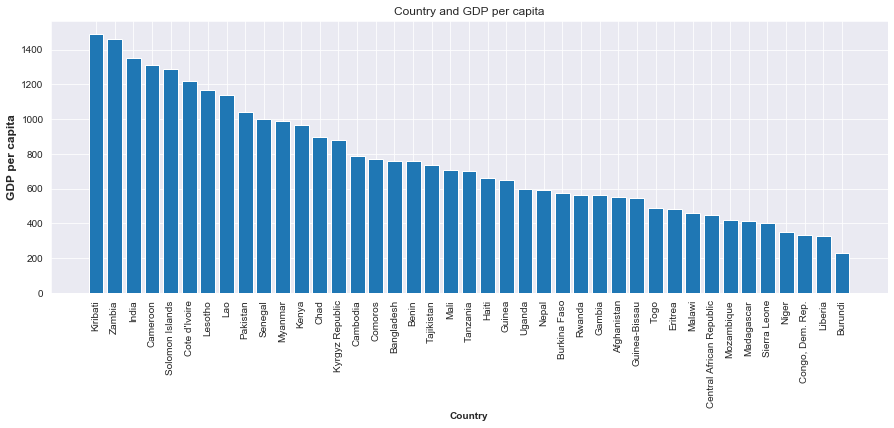

In [68]:
plt.figure(figsize=(15,5))
df = lowest_group.sort_values('gdpp',ascending=False)
plt.bar(x=df.country,
        height=df.gdpp.sort_values(ascending=False),)
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=90)
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

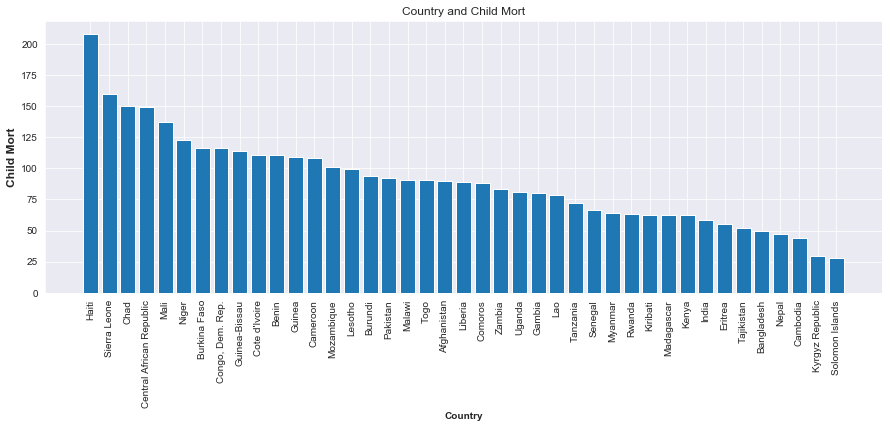

In [69]:
plt.figure(figsize=(15,5))
df = lowest_group.sort_values('child_mort',ascending=False)
plt.bar(x=df.country,
        height=df.child_mort.sort_values(ascending=False))
plt.title('Country and Child Mort')
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=90)
plt.ylabel("Child Mort", fontsize = 12, fontweight = 'bold')
plt.show()

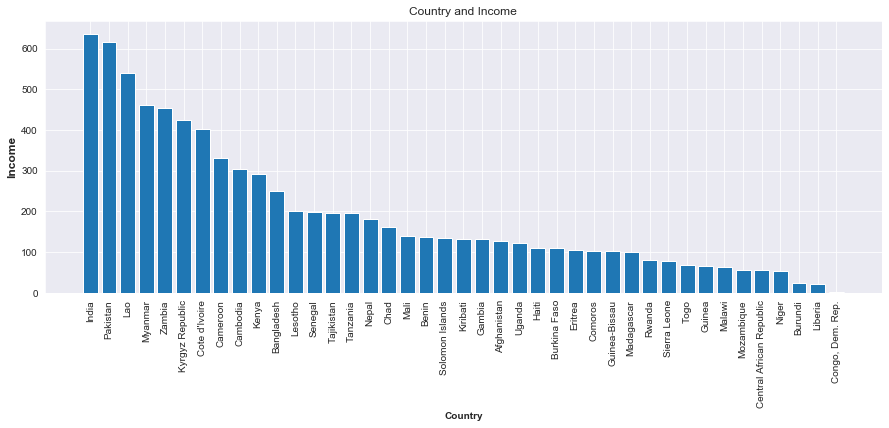

In [70]:
plt.figure(figsize=(15,5))
df = lowest_group.sort_values('income',ascending=False)
plt.bar(x=df.country,
        height=df.exports.sort_values(ascending=False))
plt.title('Country and Income')
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=90)
plt.ylabel("Income", fontsize = 12, fontweight = 'bold')
plt.show()

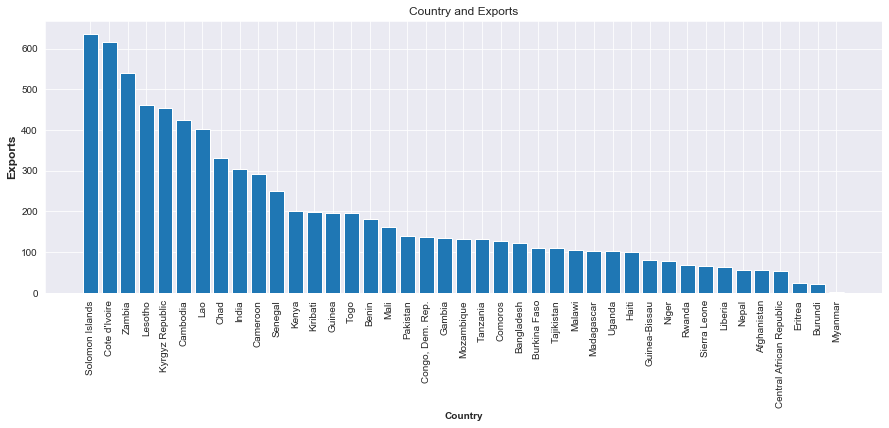

In [71]:
plt.figure(figsize=(15,5))
df = lowest_group.sort_values('exports',ascending=False)
plt.bar(x=df.country,
        height=df.exports.sort_values(ascending=False))
plt.title('Country and Exports')
plt.xlabel("Country",fontweight = 'bold')
plt.xticks(rotation=90)
plt.ylabel("Exports", fontsize = 12, fontweight = 'bold')
plt.show()

GDP plays an important role in describing the well being and developement of a country so if we sort the under-developed grouped countries by gdpp then we get these top 10 countries __Burundi__, __Liberiac__, __Congo, Dem. Rep.__, __Niger__, __Sierra Leone__, __Madagascar__, __Mozambique__, __Central African Republic__, __Malawi__ & __Eritrea__ .